#### Importation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils.layers import filter_creation
from utils.mps import mps_creation
from utils.simulation import filtration_sim

In [3]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

#### Simulation

In [4]:
tamanho_rede = 1000
mps = 1000
camadas = 6

Filtro criado, 19.14
MPs criados, 4.95


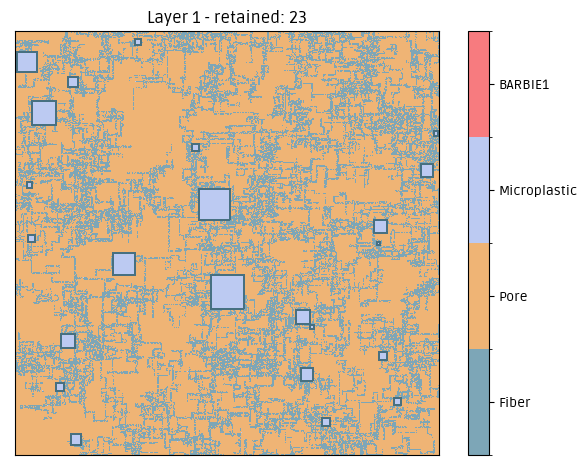

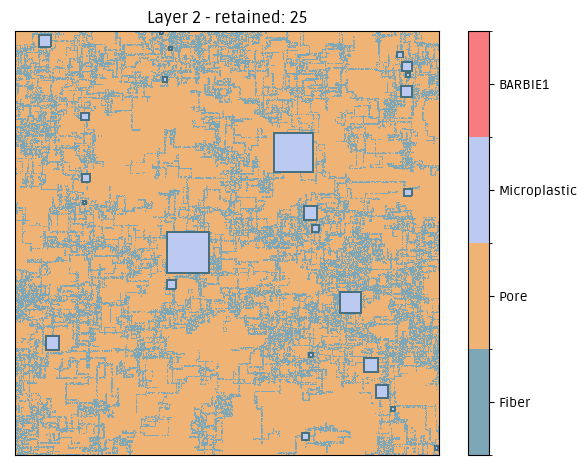

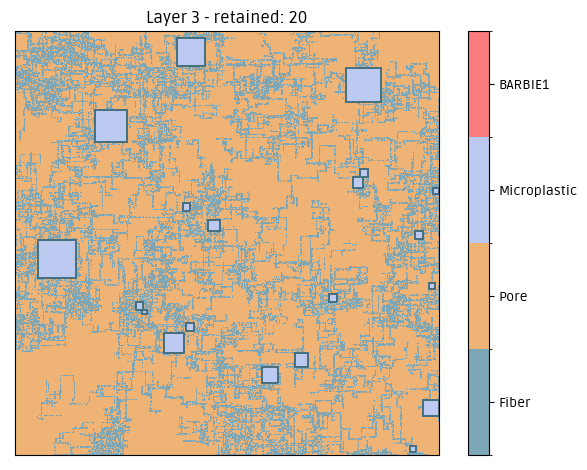

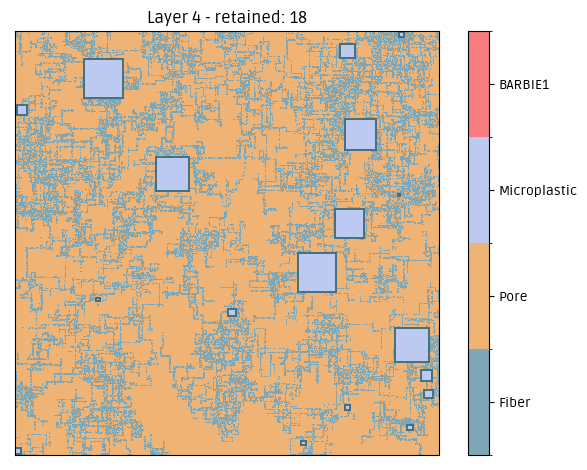

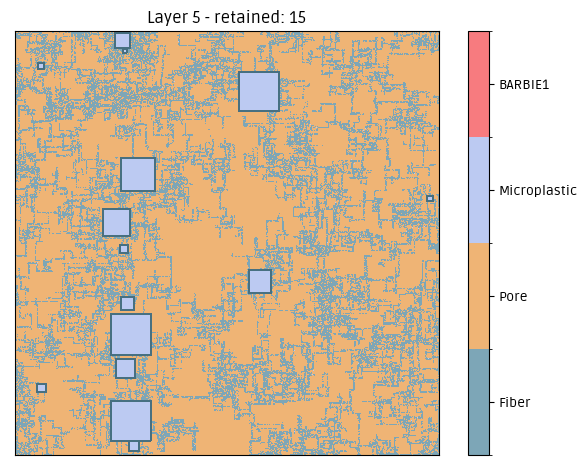

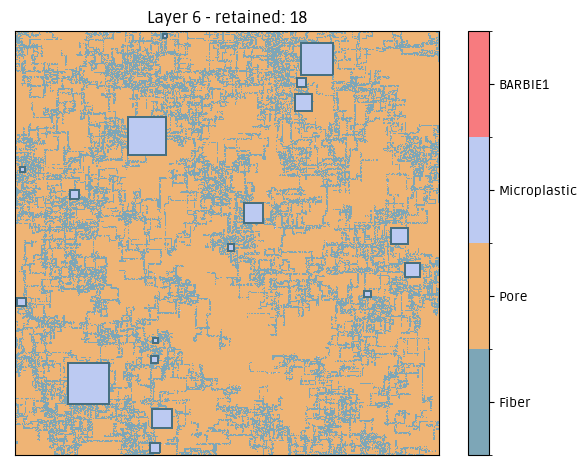

Simulação finalizada, 10.14


In [5]:
filtro = filter_creation(tamanho_rede = tamanho_rede,
                porosidade = 0.2,
                camadas = 6,
                diametro_fibra = 4,
                concentracao_cbm = 0.1,
                tamanho_cbm = 1,
                CBM=True,
                display=False)

mps_dic = mps_creation(qnt_mps = mps,
                       tamanho_limite_mp = 100,tamanho_rede=tamanho_rede)

mps_retidos,retencao_camada = filtration_sim(filtro,mps_dic,tamanho_rede=tamanho_rede,display=True,prob=False)

In [6]:
print(f'Qtd total MPs {mps}, qtd MPs retidos {mps_retidos}')
print(f'Eficiência: {100*(round(mps_retidos/mps,2))}%')

Qtd total MPs 1000, qtd MPs retidos 119
Eficiência: 12.0%


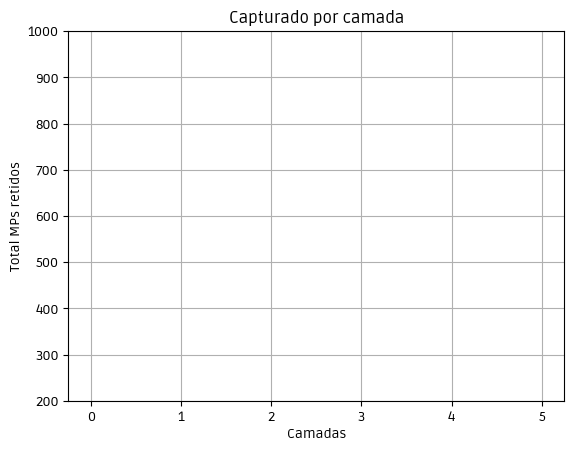

In [9]:
plt.plot(range(camadas),retencao_camada,'-o')

plt.title('Capturado por camada')
plt.xlabel('Camadas')
plt.ylabel('Total MPs retidos')

# plt.axhline(y=0,color='gray',linestyle='--')

plt.ylim(200,1000)
plt.grid()
plt.show()

#### CBM

In [8]:
filtro_c_cbm = filter_creation(tamanho_rede = 1000,
                porosidade = 0.8,
                camadas = 6,
                diametro_fibra = 3,
                concentracao_cbm = 0.5,
                tamanho_cbm = 1,
                CBM=True,
                display=False)

mps_dic_c_cbm = mps_creation(qnt_mps = mps,
                       tamanho_limite_mp = 100,tamanho_rede=1000)

mps_retidos_c_cbm,retencao_camada_c_cbm = filtration_sim(filtro_c_cbm,mps_dic_c_cbm,tamanho_rede=100,display=False)

Filtro criado, 100.36
MPs criados, 0.62
Simulação finalizada, 0.28


In [9]:
filtro_s_cbm = filter_creation(tamanho_rede = 1000,
                porosidade = 0.8,
                camadas = 6,
                diametro_fibra = 3,
                concentracao_cbm = 0.5,
                tamanho_cbm = 1,
                CBM=False,
                display=False)

mps_dic_s_cbm = mps_creation(qnt_mps = mps,
                             tamanho_limite_mp = 100,tamanho_rede=1000)

mps_retidos_s_cbm,retencao_camada_s_cbm = filtration_sim(filtro_s_cbm,mps_dic_s_cbm,tamanho_rede=100,display=False)

Filtro criado, 25.91
MPs criados, 0.62
Simulação finalizada, 0.25


In [10]:
print('Com CBM')
print(f'Qtd total MPs {mps}, qtd MPs retidos {mps_retidos_c_cbm}')
print(f'Eficiência: {100*(round(mps_retidos_c_cbm/mps,2))}%')

print('Sem CBM')
print(f'Qtd total MPs {mps}, qtd MPs retidos {mps_retidos_s_cbm}')
print(f'Eficiência: {100*(round(mps_retidos_s_cbm/mps,2))}%')

Com CBM
Qtd total MPs 1000, qtd MPs retidos 933
Eficiência: 93.0%
Sem CBM
Qtd total MPs 1000, qtd MPs retidos 720
Eficiência: 72.0%


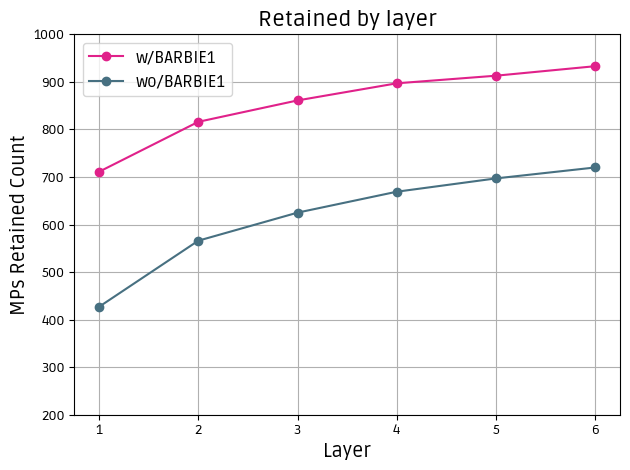

In [11]:
plt.plot(range(1,camadas+1),retencao_camada_c_cbm,'-o',label='w/BARBIE1',color='#E0218A')
plt.plot(range(1,camadas+1),retencao_camada_s_cbm,'-o',label='wo/BARBIE1',color='#477081')

plt.title('Retained by layer',fontsize=16)
plt.xlabel('Layer',fontsize=14)
plt.ylabel('MPs Retained Count',fontsize=14)

# plt.axhline(y=0,color='gray',linestyle='--')

plt.ylim(200,1000)

plt.legend(fontsize=12),plt.grid()
plt.tight_layout()
plt.savefig('results/w_wo.png',dpi=500,transparent=True)

plt.show()

#### Porosidade

Filtro criado, 18.78
MPs criados, 2.82
Simulação finalizada, 0.29
Porosidade: 0
Qtd total MPs 1000, qtd MPs retidos 880
Eficiência: 88.0%
Filtro criado, 22.09
MPs criados, 3.53
Simulação finalizada, 0.27
Porosidade: 0.1
Qtd total MPs 1000, qtd MPs retidos 886
Eficiência: 89.0%
Filtro criado, 22.02
MPs criados, 3.45
Simulação finalizada, 0.26
Porosidade: 0.3
Qtd total MPs 1000, qtd MPs retidos 873
Eficiência: 87.0%
Filtro criado, 23.55
MPs criados, 3.72
Simulação finalizada, 0.28
Porosidade: 0.5
Qtd total MPs 1000, qtd MPs retidos 890
Eficiência: 89.0%
Filtro criado, 21.52
MPs criados, 3.1
Simulação finalizada, 0.3
Porosidade: 0.7
Qtd total MPs 1000, qtd MPs retidos 879
Eficiência: 88.0%
Filtro criado, 22.55
MPs criados, 3.86
Simulação finalizada, 0.31
Porosidade: 0.9
Qtd total MPs 1000, qtd MPs retidos 902
Eficiência: 90.0%


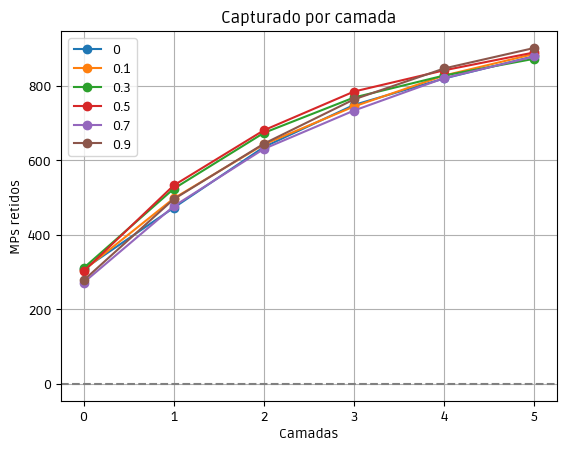

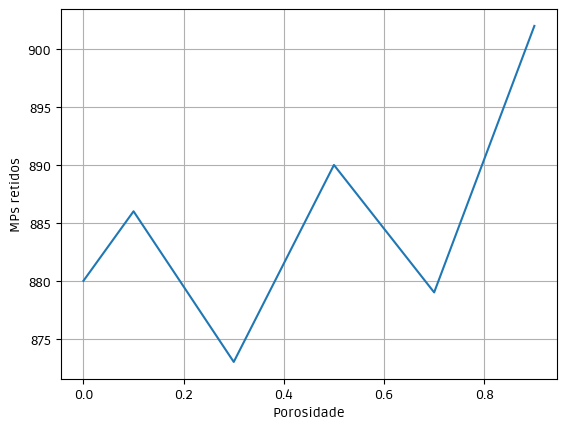

In [22]:
retencao_porosidade = []
porosidades = [0,0.1,0.3,0.5,0.7,0.9]

for por in porosidades:

    filtro = filter_creation(tamanho_rede = 1000,
                porosidade = 0.8,
                camadas = 6,
                diametro_fibra = 3,
                concentracao_cbm = 0.1,
                tamanho_cbm = 1,
                CBM=False,
                display=False)

    mps_dic = mps_creation(qnt_mps = 1000,
                        tamanho_limite_mp = 100,tamanho_rede=1000)

    mps_retidos,retencao_camada = filtration_sim(filtro,mps_dic,tamanho_rede=100,display=False)

    print(f'Porosidade: {por}')
    print(f'Qtd total MPs {mps}, qtd MPs retidos {mps_retidos}')
    print(f'Eficiência: {100*(round(mps_retidos/mps,2))}%')

    plt.plot(range(camadas),retencao_camada,'-o',label=por)

    retencao_porosidade.append(mps_retidos)

plt.title('Capturado por camada'),plt.xlabel('Camadas'),plt.ylabel('MPs retidos')
plt.axhline(y=0,color='gray',linestyle='--')
plt.legend(),plt.grid()
plt.show()

plt.plot(porosidades,retencao_porosidade)
plt.xlabel('Porosidade'),plt.ylabel('MPs retidos'),plt.grid()
plt.show()

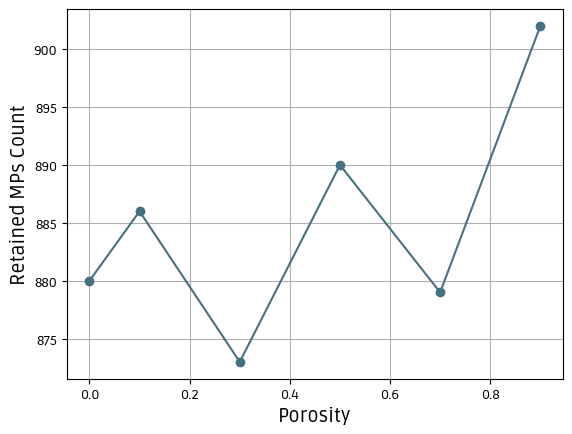

In [24]:
plt.plot(porosidades,retencao_porosidade,'o-',color='#477081')
plt.xlabel('Porosity',fontsize=14),plt.ylabel('Retained MPs Count',fontsize=14),plt.grid()
# plt.tight_layout(),plt.savefig('results/porosity.png',transparent=True,dpi=500)
plt.show()